In [1]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/102/634/original/medical_cost.zip

--2025-03-19 13:59:40--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/102/634/original/medical_cost.zip
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.167.84.148, 3.167.84.196, 3.167.84.9, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.167.84.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16425 (16K) [application/zip]
Saving to: ‘medical_cost.zip’

medical_cost.zip    100%[===================>]  16.04K  --.-KB/s    in 0s      

2025-03-19 13:59:40 (128 MB/s) - ‘medical_cost.zip’ saved [16425/16425]



In [2]:
!unzip medical_cost.zip

Archive:  medical_cost.zip
  inflating: insurance.csv           


In [3]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# h0 : medical charges are less than or equal to 13000
# ha : The medical charges are greater than 13000
# confidence level - 95%
# signifincace - alpha 0.05

In [5]:
import numpy as np
from scipy import stats

# Calculate sample mean, standard deviation, and sample size
sample_mean = df['charges'].mean()
sample_std = df['charges'].std()
n = df.shape[0]

print("sample mean:", sample_mean)

sample mean: 13270.422265141257


In [6]:
sample_std

12110.011236693994

In [7]:
# Null : The avg treatment cost is equal to 13000
# Alternate Hypothesis : The avg treatment cose is not equal to 130000

In [8]:
# Hypothesized population mean
mu_0 = 13000

# Calculate standard error
standard_error = sample_std / np.sqrt(n)

# Calculate Z statistic
z = (sample_mean - mu_0) / standard_error

print(f"Z-Statistic: {z:.4f}")

Z-Statistic: 0.8168


In [9]:
standard_error

np.float64(331.06745431568226)

In [10]:
# Calculate p-value for two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
print(f"P-Value: {p_value:.4f}")

P-Value: 0.4140


In [11]:
# Define confidence level
confidence_level = 0.95

# Calculate the standard error
standard_error = sample_std / np.sqrt(n)

# Determine the critical value for 95% confidence
z_critical = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the margin of error
margin_of_error = z_critical * standard_error

# Determine the confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

In [12]:
print(f"95% Confidence Interval for Mean Charges: (${ci_lower:.2f}, ${ci_upper:.2f})")

95% Confidence Interval for Mean Charges: ($12621.54, $13919.30)


In [13]:
# Filter the dataset for individuals with BMI > 30
df_bmi_over_30 = df[df['bmi'] > 30]

In [14]:
# 4. Calculate sample mean, standard deviation, and sample size
sample_mean_bmi = df_bmi_over_30['charges'].mean()
sample_std_bmi = df_bmi_over_30['charges'].std()
n_bmi = df_bmi_over_30.shape[0]

print(f"Sample Mean (𝑥̄): ${sample_mean_bmi:.2f}")
print(f"Sample Standard Deviation (s): ${sample_std_bmi:.2f}")
print(f"Sample Size (n): {n_bmi}")

Sample Mean (𝑥̄): $15560.93
Sample Standard Deviation (s): $14563.06
Sample Size (n): 705


In [15]:
mu_0 = 13000

# Calculate standard error
standard_error_bmi = sample_std_bmi / np.sqrt(n_bmi)

# Calculate Z statistic
z_bmi = (sample_mean_bmi - mu_0) / standard_error_bmi

print(f"Z-Statistic: {z_bmi:.4f}")

Z-Statistic: 4.6692


In [16]:
p_value_bmi = 2 * (1 - stats.norm.cdf(abs(z_bmi)))
print(f"P-Value: {p_value_bmi:.4f}")

P-Value: 0.0000


In [17]:
# Confidecne is 95%
# if Pvalue <= 0.05, reject null hypothesis ( ha)
# if pvalue >0.05 fail to reject the null hypothesis


In [18]:
# Separate smokers and non-smokers
smokers = df[df['smoker'] == 'yes']['charges']
non_smokers = df[df['smoker'] == 'no']['charges']

In [19]:
mean_smokers = smokers.mean()
std_smokers = smokers.std()
n_smokers = smokers.shape[0]

mean_non_smokers = non_smokers.mean()
std_non_smokers = non_smokers.std()
n_non_smokers = non_smokers.shape[0]

print(f"Smokers - Mean: ${mean_smokers:.2f}, Std Dev: ${std_smokers:.2f}, Sample Size: {n_smokers}")
print(f"Non-Smokers - Mean: ${mean_non_smokers:.2f}, Std Dev: ${std_non_smokers:.2f}, Sample Size: {n_non_smokers}")

Smokers - Mean: $32050.23, Std Dev: $11541.55, Sample Size: 274
Non-Smokers - Mean: $8434.27, Std Dev: $5993.78, Sample Size: 1064


In [20]:
standard_error = np.sqrt((std_smokers**2) / n_smokers + (std_non_smokers**2) / n_non_smokers)

# Calculate Z statistic
z = (mean_smokers - mean_non_smokers) / standard_error

print(f"Z-Statistic: {z:.4f}")

Z-Statistic: 32.7519


In [21]:
# Calculate p-value for one-tailed test
p_value = 1 - stats.norm.cdf(z)
print(f"P-Value: {p_value:.4f}")

P-Value: 0.0000


In [22]:
# Separate the dataset into smokers and non-smokers based on the 'smoker' column
smokers = df[df['smoker'] == 'yes']['charges']
non_smokers = df[df['smoker'] == 'no']['charges']

# Display basic statistics for both groups
print("Smokers - Charges Statistics:")
print(smokers.describe())
print("\nNon-Smokers - Charges Statistics:")
print(non_smokers.describe())

Smokers - Charges Statistics:
count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

Non-Smokers - Charges Statistics:
count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64


<ipython-input-23-e6f716038c40>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette="Set2")


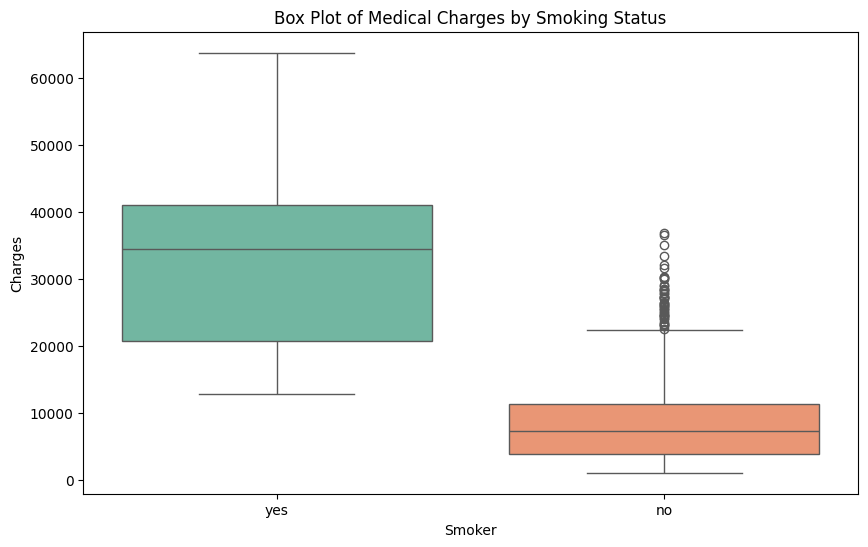

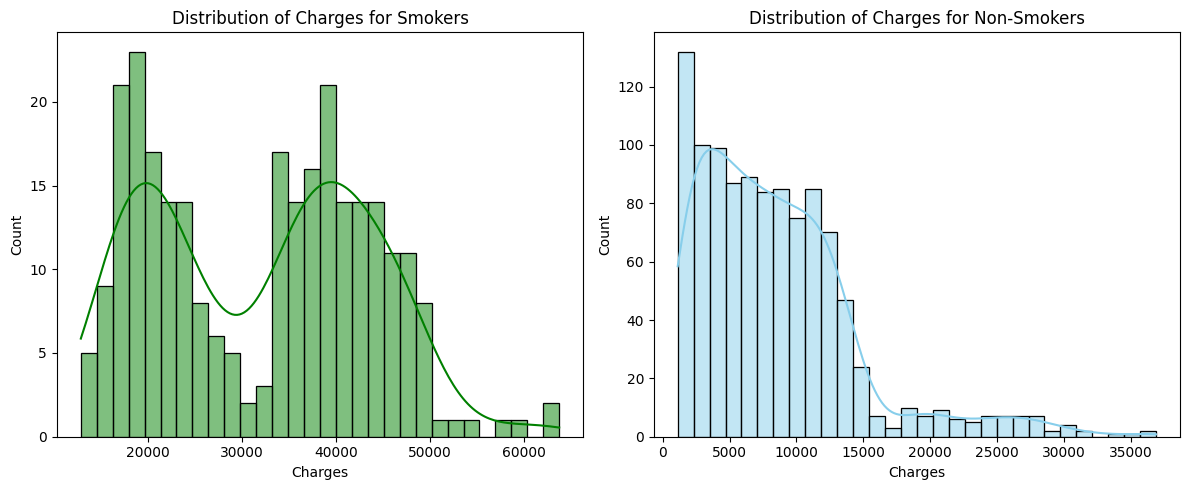

In [23]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing the Difference in Medical Charges

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette="Set2")
plt.title('Box Plot of Medical Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Histogram
plt.figure(figsize=(12, 5))

# Histogram for Smokers
plt.subplot(1, 2, 1)
sns.histplot(smokers, bins=30, kde=True, color='green')
plt.title('Distribution of Charges for Smokers')
plt.xlabel('Charges')

# Histogram for Non-Smokers
plt.subplot(1, 2, 2)
sns.histplot(non_smokers, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Charges for Non-Smokers')
plt.xlabel('Charges')

plt.tight_layout()
plt.show()

In [25]:
# Separate the dataset into males and females based on the 'sex' column
males = df[df['sex'] == 'male']['bmi']
females = df[df['sex'] == 'female']['bmi']

# Display basic statistics for both groups
print("Males - BMI Statistics:")
print(males.describe())
print("\nFemales - BMI Statistics:")
print(females.describe())

Males - BMI Statistics:
count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64

Females - BMI Statistics:
count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64


<ipython-input-26-a30fc630a191>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='bmi', data=df, palette="Set3")


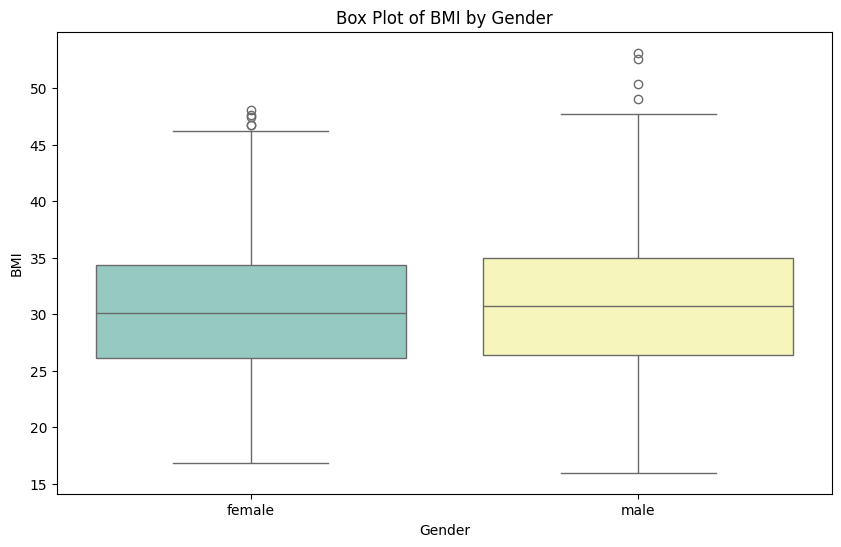

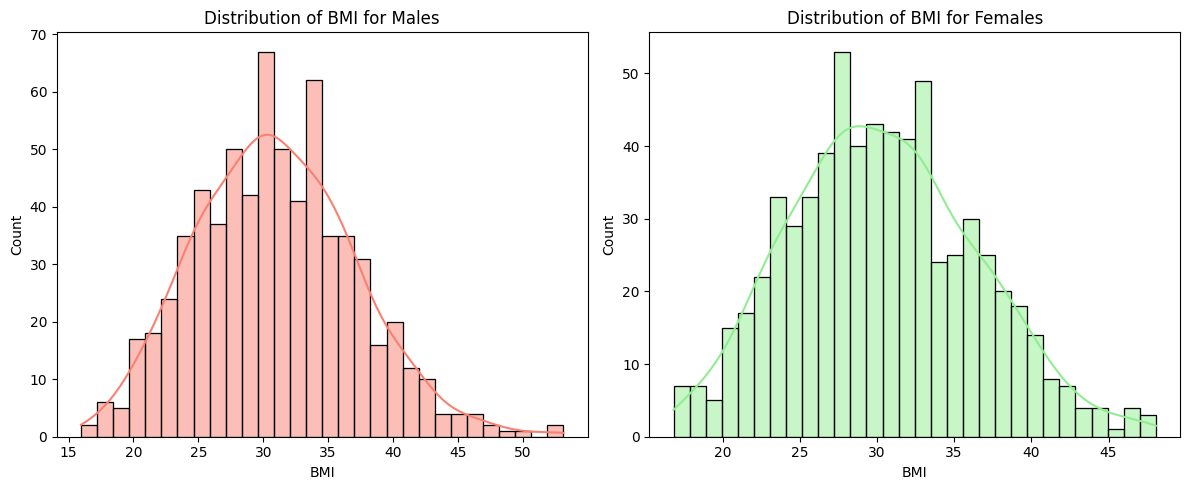

In [26]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='bmi', data=df, palette="Set3")
plt.title('Box Plot of BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

# Histogram
plt.figure(figsize=(12, 5))

# Histogram for Males
plt.subplot(1, 2, 1)
sns.histplot(males, bins=30, kde=True, color='salmon')
plt.title('Distribution of BMI for Males')
plt.xlabel('BMI')

# Histogram for Females
plt.subplot(1, 2, 2)
sns.histplot(females, bins=30, kde=True, color='lightgreen')
plt.title('Distribution of BMI for Females')
plt.xlabel('BMI')

plt.tight_layout()
plt.show()

In [27]:
# two sample t-test
# Sample sizes
n1 = len(males)
n2 = len(females)

# Sample means
mean1 = males.mean()
mean2 = females.mean()

# Sample standard deviations
std1 = males.std(ddof=1)
std2 = females.std(ddof=1)

# Display the calculated values
print(f"Males - Mean BMI: {mean1:.2f}, Standard Deviation: {std1:.2f}, Sample Size: {n1}")
print(f"Females - Mean BMI: {mean2:.2f}, Standard Deviation: {std2:.2f}, Sample Size: {n2}")

# Perform Levene's Test for equality of variances
levene_stat, levene_p = stats.levene(males, females)
print(f"Levene's Test Statistic: {levene_stat:.4f}")
print(f"Levene's Test P-Value: {levene_p:.4f}")

# Determine if variances are equal
equal_var = True if levene_p > 0.05 else False
print(f"Equal Variances Assumed: {equal_var}")

# Perform Two-Sample T-Test
t_stat, p_val = stats.ttest_ind(males, females, equal_var=equal_var) # independet samples
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

Males - Mean BMI: 30.94, Standard Deviation: 6.14, Sample Size: 676
Females - Mean BMI: 30.38, Standard Deviation: 6.05, Sample Size: 662
Levene's Test Statistic: 0.0039
Levene's Test P-Value: 0.9500
Equal Variances Assumed: True
T-Statistic: 1.6968
P-Value: 0.0900


In [29]:
# Define the known population proportion
p0 = 0.20

# Total number of individuals in the dataset
n = len(df)

# Number of smokers in the dataset
x = df[df['smoker'] == 'yes'].shape[0]

# Sample proportion
p_hat = x / n

# Display the results
print(f"Total Individuals (n): {n}")
print(f"Number of Smokers (x): {x}")
print(f"Sample Proportion (p̂): {p_hat:.4f}")

Total Individuals (n): 1338
Number of Smokers (x): 274
Sample Proportion (p̂): 0.2048


In [30]:
# Calculate the standard error (SE)
SE = np.sqrt(p0 * (1 - p0) / n)

# Calculate the Z-Statistic
z = (p_hat - p0) / SE

# Calculate the P-Value for a one-tailed test
p_value = 1 - stats.norm.cdf(z)

# Display the results
print(f"Sample Proportion (p̂): {p_hat:.4f}")
print(f"Z-Statistic: {z:.4f}")
print(f"P-Value: {p_value:.4f}")

Sample Proportion (p̂): 0.2048
Z-Statistic: 0.4374
P-Value: 0.3309


In [32]:
# Define the regions to compare
region_a = 'southeast'
region_b = 'southwest'

# Filter the dataset for each region
data_a = df[df['region'] == region_a]
data_b = df[df['region'] == region_b]

# Number of smokers in each region
x1 = data_a[data_a['smoker'] == 'yes'].shape[0]
x2 = data_b[data_b['smoker'] == 'yes'].shape[0]

# Total number of individuals in each region
n1 = len(data_a)
n2 = len(data_b)

# Sample proportions
p1_hat = x1 / n1
p2_hat = x2 / n2

# Combined proportion


p_combined = (x1 + x2) / (n1 + n2)

print("Porportin on east: ", p1_hat)
print("Porportin on west: ", p2_hat)

print("Porportin on overall: ", p_combined)


Porportin on east:  0.25
Porportin on west:  0.17846153846153845
Porportin on overall:  0.216255442670537


In [33]:

# Standard Error (SE)
SE = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))

# Z-Statistic
z = (p1_hat - p2_hat) / SE

# P-Value for two-tailed test
p_value = (1 - stats.norm.cdf(abs(z)))

# Display the results
print(f"Region A ({region_a.capitalize()}) - Smokers: {x1}/{n1} ({p1_hat:.4f})")
print(f"Region B ({region_b.capitalize()}) - Smokers: {x2}/{n2} ({p2_hat:.4f})")
print(f"Combined Proportion (p̂): {p_combined:.4f}")
print(f"Z-Statistic: {z:.4f}")
print(f"P-Value: {p_value:.4f}")

Region A (Southeast) - Smokers: 91/364 (0.2500)
Region B (Southwest) - Smokers: 58/325 (0.1785)
Combined Proportion (p̂): 0.2163
Z-Statistic: 2.2769
P-Value: 0.0114
